In [ ]:
# Generating Moons Dataset

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=10000, noise=0.4)

In [ ]:
# Doing train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Performing Randomized-Search Cross-validation

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_leaf_nodes': list(range(2, 50))}
randomized_search_cv = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=params, n_iter=10, cv=3, verbose=1, n_jobs=-1, scoring = "accuracy")
randomized_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, 31, ...]},
                   scoring='accuracy', verbose=1)

In [ ]:
#  printing cv_results

cv_results = pd.DataFrame(randomized_search_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026219,0.008618,0.007033,0.003391,32,gini,"{'max_leaf_nodes': 32, 'criterion': 'gini'}",0.840617,0.856837,0.838405,0.845286,0.008217,9
1,0.037725,0.002877,0.006009,0.004807,21,log_loss,"{'max_leaf_nodes': 21, 'criterion': 'log_loss'}",0.844473,0.853408,0.846550,0.848143,0.003818,1
2,0.022338,0.005286,0.002384,0.000257,11,gini,"{'max_leaf_nodes': 11, 'criterion': 'gini'}",0.842331,0.855979,0.845692,0.848001,0.005806,3
3,0.039630,0.010893,0.004510,0.002780,36,entropy,"{'max_leaf_nodes': 36, 'criterion': 'entropy'}",0.846187,0.857265,0.840977,0.848143,0.006792,2
4,0.039551,0.007252,0.004241,0.002991,44,entropy,"{'max_leaf_nodes': 44, 'criterion': 'entropy'}",0.844045,0.855979,0.840977,0.847000,0.006471,7
5,0.048234,0.001504,0.002971,0.000968,43,log_loss,"{'max_leaf_nodes': 43, 'criterion': 'log_loss'}",0.845330,0.855979,0.840977,0.847429,0.006302,6
6,0.018177,0.001294,0.003371,0.001421,5,gini,"{'max_leaf_nodes': 5, 'criterion': 'gini'}",0.842331,0.855979,0.845692,0.848001,0.005806,3
7,0.036219,0.004430,0.003446,0.001285,17,entropy,"{'max_leaf_nodes': 17, 'criterion': 'entropy'}",0.842759,0.853408,0.846550,0.847572,0.004407,5
8,0.028177,0.002654,0.002166,0.000119,48,entropy,"{'max_leaf_nodes': 48, 'criterion': 'entropy'}",0.844045,0.855979,0.840977,0.847000,0.006471,7
9,0.025231,0.012299,0.002003,0.000113,37,gini,"{'max_leaf_nodes': 37, 'criterion': 'gini'}",0.835904,0.857265,0.833262,0.842144,0.010747,10


In [ ]:
# Performing Grid-Search Cross-validation

import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_leaf_nodes': list(range(2, 50))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=3, verbose=1, n_jobs=-1, scoring = "accuracy")
grid_search_cv.fit(X_train, y_train)



Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...]},
             scoring='accuracy', verbose=1)

In [ ]:
#  printing cv_results

cv_results = pd.DataFrame(grid_search_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008176,0.000240,0.002269,0.000129,gini,2,"{'criterion': 'gini', 'max_leaf_nodes': 2}",0.772065,0.774968,0.776254,0.774429,0.001752,142
1,0.009423,0.000644,0.002156,0.000271,gini,3,"{'criterion': 'gini', 'max_leaf_nodes': 3}",0.821765,0.820403,0.814402,0.818857,0.003199,139
2,0.010455,0.000511,0.002307,0.000240,gini,4,"{'criterion': 'gini', 'max_leaf_nodes': 4}",0.842331,0.855979,0.845692,0.848001,0.005806,55
3,0.012086,0.000405,0.002213,0.000214,gini,5,"{'criterion': 'gini', 'max_leaf_nodes': 5}",0.842331,0.855979,0.845692,0.848001,0.005806,55
4,0.013358,0.002012,0.002781,0.000769,gini,6,"{'criterion': 'gini', 'max_leaf_nodes': 6}",0.842331,0.855979,0.845692,0.848001,0.005806,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.024031,0.000640,0.001987,0.000056,log_loss,45,"{'criterion': 'log_loss', 'max_leaf_nodes': 45}",0.844045,0.855979,0.840977,0.847000,0.006471,104
140,0.024255,0.000364,0.002037,0.000031,log_loss,46,"{'criterion': 'log_loss', 'max_leaf_nodes': 46}",0.844045,0.855979,0.840977,0.847000,0.006471,104
141,0.024431,0.000668,0.001958,0.000025,log_loss,47,"{'criterion': 'log_loss', 'max_leaf_nodes': 47}",0.844045,0.855979,0.840977,0.847000,0.006471,104
142,0.024816,0.000340,0.001960,0.000022,log_loss,48,"{'criterion': 'log_loss', 'max_leaf_nodes': 48}",0.844045,0.855979,0.840977,0.847000,0.006471,104


In [ ]:
# Analysizing best params with their scores

cv_results.sort_values(by=['rank_test_score']).iloc[:10, [6,10,12]]

,params,mean_test_score,rank_test_score
18,"{'criterion': 'gini', 'max_leaf_nodes': 20}",0.851001,1
17,"{'criterion': 'gini', 'max_leaf_nodes': 19}",0.851001,1
16,"{'criterion': 'gini', 'max_leaf_nodes': 18}",0.850429,3
19,"{'criterion': 'gini', 'max_leaf_nodes': 21}",0.850287,4
71,"{'criterion': 'entropy', 'max_leaf_nodes': 25}",0.850001,5
119,"{'criterion': 'log_loss', 'max_leaf_nodes': 25}",0.850001,5
15,"{'criterion': 'gini', 'max_leaf_nodes': 17}",0.849715,7
70,"{'criterion': 'entropy', 'max_leaf_nodes': 24}",0.849429,8
118,"{'criterion': 'log_loss', 'max_leaf_nodes': 24}",0.849429,8
14,"{'criterion': 'gini', 'max_leaf_nodes': 16}",0.849286,10


In [ ]:
# Printing the best_parameters

print(grid_search_cv.best_params_)

{'criterion': 'gini', 'max_leaf_nodes': 19}


In [ ]:
# Evaluating the best_estimator

best_estimator = grid_search_cv.best_estimator_
print(best_estimator)

print("Accuracy: ", best_estimator.score(X_test, y_test))

DecisionTreeClassifier(max_leaf_nodes=19, random_state=42)
Accuracy:  0.8653333333333333


In [ ]:
# printing train and test accuracy of the best_estimator

print("Train Accuracy: ", best_estimator.score(X_train, y_train))
print("Test Accuracy: ", best_estimator.score(X_test, y_test))

Train Accuracy:  0.8582857142857143
Test Accuracy:  0.8653333333333333


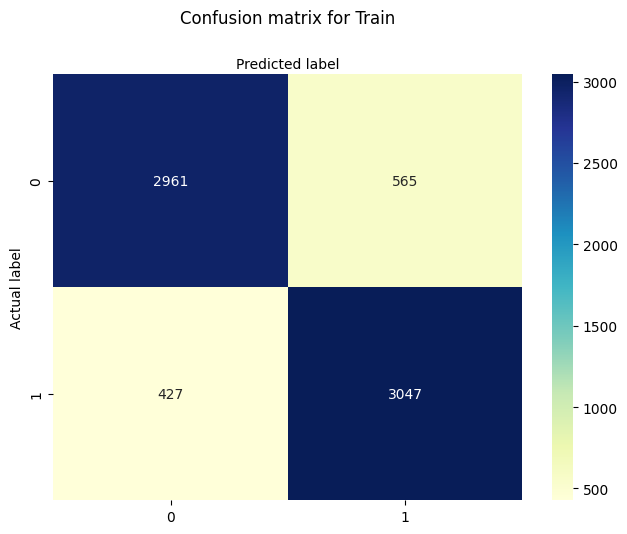

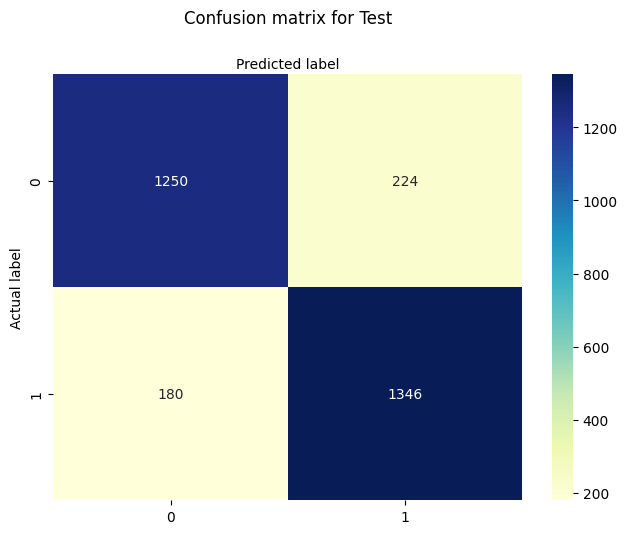

In [ ]:
#printing confusion_matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y_pred = best_estimator.predict(X_train)
C = confusion_matrix(y_train, y_pred)

fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(C), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Train', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred = best_estimator.predict(X_test)
C = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(C), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Test', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

